# Chat intents

## Initial Exploration

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

import matplotlib.pyplot as plt

In [2]:
import sklearn
import re

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/dave/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/dave/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dave/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load data

In [10]:
data_full = pd.read_csv('data/raw/train.csv')
data_full.head(100)

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived after 2 weeks?,card_arrival
2,I have been waiting over a week. Is the card still coming?,card_arrival
3,Can I track my card while it is in the process of delivery?,card_arrival
4,"How do I know if I will get my card, or if it is lost?",card_arrival
5,When did you send me my new card?,card_arrival
6,Do you have info about the card on delivery?,card_arrival
7,What do I do if I still have not received my new card?,card_arrival
8,Does the package with my card have tracking?,card_arrival
9,I ordered my card but it still isn't here,card_arrival


In [6]:
len(data_full)

10003

In [7]:
data_full.category.value_counts()

card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
transaction_charged_twice                           175
declined_cash_withdrawal                            173
transfer_fee_charged                                172
transfer_not_received_by_recipient                  171
balance_not_updated_after_bank_transfer             171
request_refund                                      169
card_payment_not_recognised                         168
card_payment_wrong_exchange_rate                    167
extra_charge_on_statement                           166
wrong_exchange_rate_for_cash_withdrawal             163
Refund_not_showing_up                               162
reverted_card_payment?                              161
cash_withdrawal_not_recognised                  

In [8]:
data_full[data_full['category']=='card_swallowed']

,text,category
6245,What do I do if the ATM took my card?,card_swallowed
6246,What do I do now my credit card has been swallowed by the ATM?,card_swallowed
6247,An ATM machine didn't give me back my card.,card_swallowed
6248,"My card got trapped inside an ATM, what should I do?",card_swallowed
6249,What do I do if I can't get my card out of the ATM?,card_swallowed
6250,My card got stuck in an ATM.,card_swallowed
6251,Your machine took my card. How do I get it back?,card_swallowed
6252,"I can't get my card out of the ATM, what should I do now?",card_swallowed
6253,My card is stuck in the ATM?,card_swallowed
6254,I didn't get my card back from the ATM.,card_swallowed


In [9]:
data_full.category.value_counts()

card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
transaction_charged_twice                           175
declined_cash_withdrawal                            173
transfer_fee_charged                                172
transfer_not_received_by_recipient                  171
balance_not_updated_after_bank_transfer             171
request_refund                                      169
card_payment_not_recognised                         168
card_payment_wrong_exchange_rate                    167
extra_charge_on_statement                           166
wrong_exchange_rate_for_cash_withdrawal             163
Refund_not_showing_up                               162
reverted_card_payment?                              161
cash_withdrawal_not_recognised                  

In [10]:
data_sample = data_full.sample(n=1000, random_state=123)

In [11]:
data_sample.category.value_counts()

Refund_not_showing_up                               26
cash_withdrawal_charge                              24
pending_card_payment                                23
cancel_transfer                                     23
direct_debit_payment_not_recognised                 22
transfer_not_received_by_recipient                  22
cash_withdrawal_not_recognised                      21
request_refund                                      21
balance_not_updated_after_cheque_or_cash_deposit    18
verify_top_up                                       18
verify_source_of_funds                              18
declined_card_payment                               17
transfer_fee_charged                                17
visa_or_mastercard                                  17
card_payment_not_recognised                         17
wrong_exchange_rate_for_cash_withdrawal             17
declined_cash_withdrawal                            17
wrong_amount_of_cash_received                       17
top_up_by_

Steps:
1. Stopword removal, stemming, word distribution
2. stopword removal, stemming, LDA topic modeling
3. preprocess + knn
4. weakly supervised approaches
5. embeddings
6. tools for labeling (?)

## Clean data

In [12]:
stop_words = set(stopwords.words('english'))

print(stop_words)

{'over', 'with', 's', 'that', 'these', 'am', 'very', 'doing', 'now', 'then', 'no', 'through', 'our', 'd', 'such', 'couldn', 'up', 'll', "shan't", 'himself', 'and', 'again', 'you', 'before', 'hadn', 'wouldn', 'an', 'off', 'how', 'can', 'me', 'she', 'its', 'below', "wouldn't", 'the', 'been', 'ma', 'do', 'when', 'few', 'her', 'whom', 'more', 'most', 'out', 'against', 'aren', 'it', "shouldn't", 'themselves', 'yourselves', 'does', 'some', 'ain', 'yours', 'itself', 'further', 'him', 'were', 'about', 'they', 'hers', 'didn', 'having', 'i', "isn't", 'to', 'isn', 'on', 'm', 'because', 'being', 'a', 'but', "weren't", 'ours', 't', 'was', 'yourself', "it's", 'so', 'has', 'have', 'during', 'ourselves', 'will', 'any', "didn't", 'at', "you'll", 'herself', 'from', 'just', 'o', 'shan', "hadn't", "hasn't", "mightn't", 'be', 'where', "you'd", 'after', 'those', 'your', 'above', 'under', 'down', 'which', "needn't", 'shouldn', 'should', 'while', 'doesn', 'had', 'mightn', 'is', 'don', 'mustn', 'weren', 'other

In [39]:
def clean_text(text):
    """
    Summary: turns text input string into list of cleaned word tokens
    """
    
    # remove numbers
    clean_text = re.sub(r'[0-9]+', '', text)
    
    # remove punctuation
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    
    # convert everything to lowercase
    clean_text = clean_text.lower()
    
    # tokenize
    wt = WhitespaceTokenizer()
    words = wt.tokenize(clean_text)
    
    # remove stop words
    cleaned_words = []
    for w in words:
        if w not in stop_words:
            cleaned_words.append(w)
            
    # lemmatize words
    wnl = WordNetLemmatizer()
    wnl_lemmatized_tokens = []
    for token in cleaned_words:
        wnl_lemmatized_tokens.append(wnl.lemmatize(token))
    
    lemmatized_words = ' '.join(wnl_lemmatized_tokens)
    
    return lemmatized_words

In [ ]:
def 

### Word distributions across all messages in sample

In [37]:
data_sample.head()

,text,category,cleaned_text
1024,I'm worried my card might be lost in the mail? How long does it usually take to arrive?,card_delivery_estimate,"[im, worried, card, might, lost, mail, long, usually, take, arrive]"
9405,I got charged a fee that shouldn't be there from my cash,cash_withdrawal_charge,"[got, charged, fee, shouldnt, cash]"
9368,Do you charge for making a withdrawal? I took some money out of my account earlier and I was charged for this.,cash_withdrawal_charge,"[charge, making, withdrawal, took, money, account, earlier, charged]"
3414,Is there an issue with my account? I don't see a cheque deposit that I made yesterday. Please assist.,balance_not_updated_after_cheque_or_cash_deposit,"[issue, account, dont, see, cheque, deposit, made, yesterday, please, assist]"
7402,Are there ways for other people to send me money?,receiving_money,"[way, people, send, money]"


In [40]:
data_sample['cleaned_text'] = data_sample['text'].apply(lambda x: clean_text(x))
data_sample.head()

,text,category,cleaned_text
1024,I'm worried my card might be lost in the mail? How long does it usually take to arrive?,card_delivery_estimate,im worried card might lost mail long usually take arrive
9405,I got charged a fee that shouldn't be there from my cash,cash_withdrawal_charge,got charged fee shouldnt cash
9368,Do you charge for making a withdrawal? I took some money out of my account earlier and I was charged for this.,cash_withdrawal_charge,charge making withdrawal took money account earlier charged
3414,Is there an issue with my account? I don't see a cheque deposit that I made yesterday. Please assist.,balance_not_updated_after_cheque_or_cash_deposit,issue account dont see cheque deposit made yesterday please assist
7402,Are there ways for other people to send me money?,receiving_money,way people send money


In [41]:
sample_text = ''.join(list(data_sample['text'].values))
print(sample_text[0:400])

I'm worried my card might be lost in the mail? How long does it usually take to arrive?I got charged a fee that shouldn't be there from my cashDo you charge for making a withdrawal? I took some money out of my account earlier and I was charged for this.Is there an issue with my account?  I don't see a cheque deposit that I made yesterday.  Please assist.Are there ways for other people to send me m


In [43]:
clean_sample_text = ''.join(list(data_sample['cleaned_text'].values))
print(clean_sample_text[0:400])

im worried card might lost mail long usually take arrivegot charged fee shouldnt cashcharge making withdrawal took money account earlier chargedissue account dont see cheque deposit made yesterday please assistway people send moneyreceive moneychange addressstill received new cardanywhere cant use cardwant multiple currency account possiblewouldnt atm give cashbusiness euadd people account topim u


In [44]:
# tokenize
wt = WhitespaceTokenizer()
clean_tokens = wt.tokenize(clean_sample_text)

freq_dist = FreqDist(clean_tokens)
print(freq_dist)

<FreqDist with 1596 samples and 4352 outcomes>


In [45]:
freq_dist.most_common(500)

[('card', 143),
 ('money', 80),
 ('account', 75),
 ('payment', 72),
 ('transfer', 60),
 ('cash', 48),
 ('need', 40),
 ('get', 38),
 ('top', 38),
 ('please', 37),
 ('exchange', 32),
 ('like', 32),
 ('take', 31),
 ('charged', 31),
 ('withdrawal', 31),
 ('use', 30),
 ('new', 29),
 ('still', 29),
 ('fee', 28),
 ('atm', 28),
 ('refund', 28),
 ('made', 27),
 ('know', 27),
 ('time', 27),
 ('didnt', 26),
 ('app', 26),
 ('rate', 25),
 ('virtual', 24),
 ('using', 24),
 ('pending', 24),
 ('dont', 23),
 ('currency', 21),
 ('wrong', 20),
 ('getting', 20),
 ('see', 19),
 ('help', 19),
 ('make', 19),
 ('transaction', 19),
 ('declined', 18),
 ('showing', 18),
 ('would', 18),
 ('long', 17),
 ('show', 17),
 ('bank', 17),
 ('disposable', 17),
 ('ago', 17),
 ('isnt', 16),
 ('got', 16),
 ('tried', 16),
 ('amount', 16),
 ('im', 15),
 ('charge', 15),
 ('withdraw', 15),
 ('working', 15),
 ('something', 15),
 ('one', 15),
 ('check', 15),
 ('going', 14),
 ('topup', 14),
 ('debit', 14),
 ('someone', 14),
 ('canc

In [46]:
freq_dist.get('account')

75

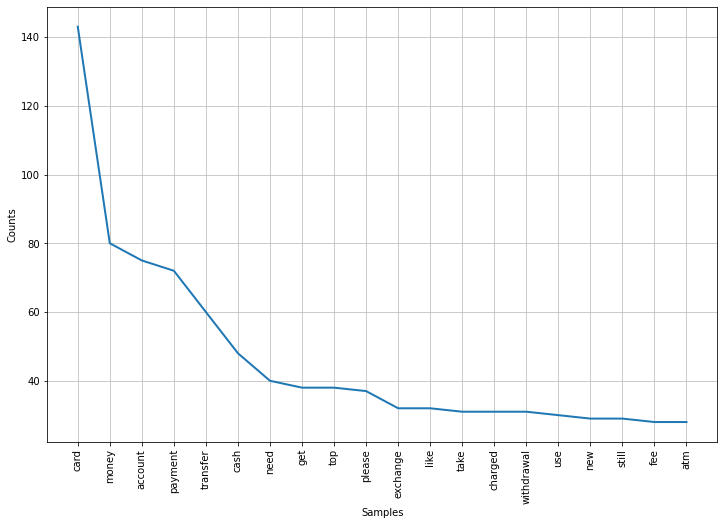

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
freq_dist.plot(20, cumulative=False)
plt.show()

## Save cleaned data

In [48]:
data_sample.to_csv('data/processed/data_sample.csv')